In [45]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import xcorr
import os
from functools import reduce
from ipywidgets import widgets
from IPython.display import Audio
from scipy.io.wavfile import read

In [46]:
def get_sinusoid(amp, freq, sample_freq, n_sample):
    n = np.arange(0, n_sample)
    return n/sample_freq, amp * np.sin(freq/sample_freq*2*np.pi*n)

In [47]:
def to_db(h, N=2):
    return 20*np.log10(np.maximum(np.abs(h)*2/N, 1e-5))

In [48]:
def get_timeAxis(fs, sin):
    n = np.arange(len(sin))
    return n/fs

In [49]:
def niceplot():
    plt.margins(x=0)
    plt.grid()

In [50]:
fs, sin = read('cmu_us_bdl_arctic/wav/arctic_a0001.wav')
t = get_timeAxis(fs, sin)

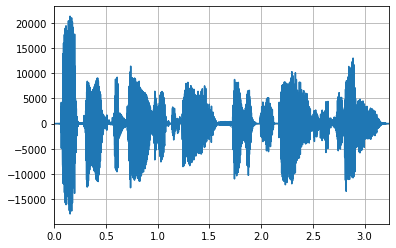

In [51]:
plt.plot(t, sin)
niceplot()

In [52]:
Audio(sin, rate=fs)

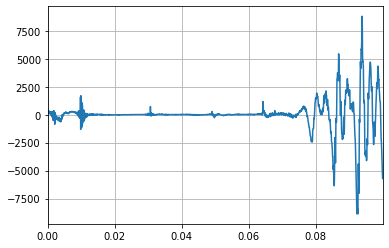

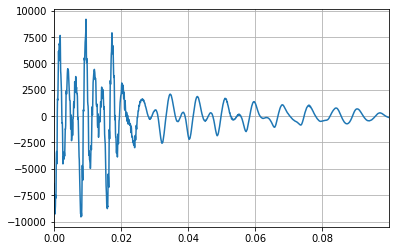

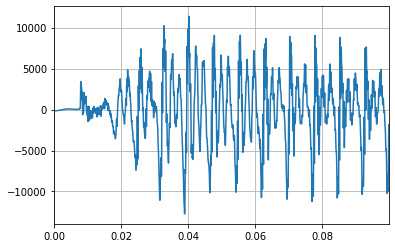

In [53]:
frames = utils.split(sin, 100, 100, fs)

for frame in frames[5:8]:
    plt.figure()
    frame_t = get_timeAxis(fs, frame)
    plt.plot(frame_t, frame)
    niceplot()

In [54]:
Audio(frames[7], rate=fs)

In [55]:
# manPath = 'cmu_us_bdl_arctic/wav/'
# womanPath = 'cmu_us_slt_arctic/wav/'

# def get_energies(path, n=100):
#     files = os.listdir(path)
#     frames = []

#     for file in files[:n]:
#         fs, sin = read(os.path.join(path, file))
#         f = utils.split(sin, 100, 100, fs)
#         frames.extend(f) 

#     energies = []

#     for frame in frames:
#         energies.append(utils.energy(frame))
    
#     return energies

# plt.figure(figsize=(8,5))
# plt.hist(get_energies(manPath), bins=100)
# plt.grid()

# plt.figure(figsize=(8,5))
# plt.hist(get_energies(womanPath), bins=100)
# plt.grid()

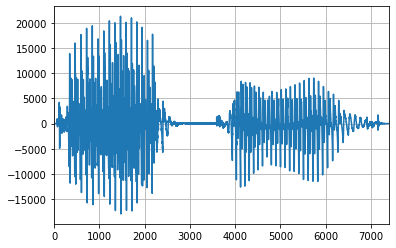

In [56]:
arthur = sin[1000:8400]
plt.plot(arthur)
niceplot()

Audio(arthur, rate=fs)

In [57]:
a = arthur[1000:1000+round(fs*0.1)]
th = arthur[3600:3600+round(fs*0.1)]
u = arthur[4800:4800+round(fs*0.1)]

In [58]:
print(utils.frame_energy(a)/1e10)
Audio(a, rate=fs)

-0.0001800738


In [59]:
print(utils.formants(th)/1e10)
Audio(th, rate=fs)

TypeError: formants() missing 3 required positional arguments: 'width', 'step', and 'fs'

In [ ]:
print(utils.frame_energy(u)/1e10)
Audio(u, rate=fs)

# Voived sounds detection tests

In [ ]:
start = 1.6
end = 2.5
sound = sin[round(fs*start): round(fs*end)]
width = 20 # 1/minf0
step = 5
threshold = 0.20 #0.12 #0.08

h = abs(sound).max()*1.15
arth_frames = utils.split(sound, width, step, fs)
steplen = int(step/1000 * fs)
t_arthur = get_timeAxis(fs, sound)
result = []

for f in arth_frames:
    if utils.energy(f) >= threshold*1e10:
        result.extend([h]*steplen)
    else:
        result.extend([0]*steplen)
        
result = np.array(result)
t_result = get_timeAxis(fs, result)


plt.figure(figsize=(10,6))
plt.plot(t_arthur+start, sound)
plt.fill_between(t_result+start, result, -result, color='green', alpha=0.4)
niceplot()

Audio(sound, rate=fs)

In [ ]:
#         PH      I    L   I  P        S        T     E     E       L

In [ ]:
fs2, sin2 = read('cmu_us_slt_arctic/wav/arctic_a0001.wav')

In [ ]:
start = 1.7
end = 2.47
sound = sin2[round(fs2*start): round(fs2*end)]
width = 1000/50
step = 5
threshold = 0.35

h = abs(sound).max()*1.15
arth_frames = utils.split(sound, width, step, fs2)
steplen = int(step/1000 * fs2)
t_arthur = get_timeAxis(fs2, sound)
result = []

for f in arth_frames:
    if utils.energy(f) >= threshold*1e10:
        result.extend([h]*steplen)
    else:
        result.extend([0]*steplen)
        
result = np.array(result)
t_result = get_timeAxis(fs2, result)


plt.figure(figsize=(10,6))
plt.plot(t_arthur+start, sound)
plt.fill_between(t_result+start, result, -result, color='green', alpha=0.4)
niceplot()

Audio(sound, rate=fs2)

# Autocorr tests

In [ ]:
frames = utils.split(sin, width, step, fs)

voiced = np.array([frame for frame in frames if utils.energy(frame) >= threshold*1e10])
unvoiced = np.array([frame for frame in frames if utils.energy(frame) < threshold*1e10])

lags_voiced, peaks_voiced = xcorr.xcorr(voiced[1])
lags_unvoiced, peaks_unvoiced = xcorr.xcorr(unvoiced[45])

plt.figure(figsize=(10,6))
plt.plot(lags_voiced, peaks_voiced)
niceplot()

plt.figure(figsize=(10,6))
plt.plot(lags_unvoiced, peaks_unvoiced)
niceplot()

In [ ]:
t, sinla = get_sinusoid(6000, 440, fs, fs*2)
Audio(sinla, rate=fs)

In [ ]:
framela = utils.split(sinla, 40, 5, fs)[12]
lagsla, peaksla = xcorr.xcorr(framela, maxlag=fs//50)

plt.figure(figsize=(10,6))
plt.plot(lagsla, peaksla)
niceplot()

In [ ]:
fs/utils.get_distance(lagsla, peaksla)

In [ ]:
res = utils.autocorrelation(sinla, 21, 5, fs, 5)
res

In [ ]:
import utils

utils.autocorrelation(sinla, 20, 5, fs, 0.2)

In [ ]:
framela = utils.split(sinla, 20, 5, fs)[12]
compo = framela + voiced[42]

lagsla, peaksla = xcorr.xcorr(framela)
lagv42, peaksv42 = xcorr.xcorr(voiced[42])
lagcompo,  peakscompo = xcorr.xcorr(compo)

plt.figure(figsize=(10,6))
plt.plot(framela)
niceplot()

plt.figure(figsize=(10,6))
plt.plot(voiced[42])
niceplot()

plt.figure(figsize=(10,6))
plt.plot(compo)
niceplot()

plt.figure(figsize=(10,6))
plt.plot(lagsla, peaksla)
niceplot()

plt.figure(figsize=(10,6))
plt.plot(lagv42, peaksv42)
niceplot()

plt.figure(figsize=(10,6))
plt.plot(lagcompo, peakscompo)
niceplot()

In [ ]:
f = 440

armo = np.arange(1, 7)
sinla = np.zeros(fs*2)

for k in armo:
    sinla += get_sinusoid(6000, k*440, fs, fs*2)[1]

framela = utils.split(sinla, 20, 5, fs)[12]

plt.figure(figsize=(10,6))
plt.plot(framela)
niceplot()

lagsla, peaksla = xcorr.xcorr(framela)

plt.figure(figsize=(10,6))
plt.plot(lagsla, peaksla)
niceplot()

In [ ]:
import scipy.signal as sgl
from scipy import fft
from ipywidgets import interact

def to_db(h, N=2):
    return 20*np.log10(np.maximum(np.abs(h)*2/N, 1e-5))

def test(f, a):

    armo = np.arange(1, a)
    sinla = np.zeros(fs*2)
    

    for k in armo:
        sinla += get_sinusoid(6000, k*f, fs, fs*2)[1]
        
    sinla = utils.normalize(sinla)

    framela = utils.split(sinla, 20, 5, fs)[12]
    framela *= sgl.windows.hamming(framela.shape[0])

    w, spectrum = sgl.freqz(framela)
    log_spectrum = np.log(spectrum)
    res = abs(np.fft.ifft(log_spectrum))
    time = np.linspace(0, 0.02, res.shape[0])

#     plt.plot(log_spectrum)
#     niceplot()

    # plt.figure()
    # plt.plot(time, abs(sgl.freqz(spectrum)[1]))
    # niceplot()


    plt.figure()
    plt.plot(time, res)
    niceplot()

    # plt.figure()
    # plt.plot(time, abs(fft.ifft(log_spectrum)))
    # niceplot()

    # plt.figure()
    # plt.plot(abs(np.fft.irfft(log_spectrum)))
    # niceplot()


    # plt.figure()
    # plt.plot(time, to_db(fft.ifft(log_spectrum)))
    # niceplot()

    # plt.figure()
    # plt.plot(to_db(np.fft.irfft(log_spectrum)))
    # niceplot()
    
interact(test, f=(60, 8000, 500), a=(1, 10, 1))
fs

In [ ]:
sgl.windows.hamming(framela.shape[0]).shape
framela *= sgl.windows.hamming(framela.shape[0])

In [ ]:
fr = voiced[42]
fr = utils.normalize(fr)

w, spectrum = sgl.freqz(framela)
log_spectrum = np.log(spectrum)
res = np.fft.ifft(log_spectrum).real